# Additional guidance to Capstone Project Assessment

##  <span style='color:blue '> Overview  </span>
This notebook contains guiding suggestions for completion of No. 1-9 of the stated project requirements from "Data Science Capstone Project.docx.pdf" 
<blockquote>
1. Identify the problem: write a high-quality problem statement to describe
the goals of your study and criteria for success.<br>
2. Explore the data: perform EDA methods with visualization and statistical
analysis to show risks and assumptions of your data.<br>
3. Clean the data: handle outliers, missing values, and scaling issues.<br>
4. Build a baseline model.<br>
5. Visualize and analyze the results of the model.<br>
6. Improve on the previous model based on analysis of results and further<br>
EDA.<br>
7. Identify limitations of dataset and results (what was missing, unknown,
what you wish you had but was unavailable, etc).<br>
8. Explain the results: create a slide deck where you assume you are
presenting your results to your manager who is non-technical.<br>
9. Make suggestions based on your findings.
</blockquote>

Throughout this notebook each suggestion made will contain their relevant Lessons for reference if applicable. (e.g. A suggestion to apply GridSearchCV will point to Lesson 7 for reference codes)


## Working with jupyter notebook
![](img/newnotebook.PNG)<br>
In Jupyter homepage click on the red-highlighted "New" icon, then click on "Python 3" to create a new jupyter notebook within the current file directory.

![](img/cell.PNG)<br>
Within the notebook click on the a cell(blue bar at the left of cell) and click on the red-highlighted "Code" to change between a "Code" cell and a "Markdown" cell. Code cells will run all contents within the cell as python code while Markdown contains formatting of words/images within the notebook. Double clicking on this cell will show how it is formatted.

# Guidance

##  <span style='color:blue '> Requirement 1: Write a high-quality problem statement  </span>
We shall use the default dataset found [here](https://www.kaggle.com/c/home-credit-default-risk/overview), which conveniently includes a problem that they are looking to solve in its description.

<blockquote>
    Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.  <br>

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.
</blockquote>

Reword the description as you prefer, our predictive model will aim to accurately classify whether a client has difficulty repaying their loan on time.

### Criteria for success
To keep things simple, our criteria for success would be to beat a scenario where we randomly guess whether a client will have difficulty in loan repayment. To evaluate our models we shall use a confusion matrix and Area Under Receiver Operating Curve(AUROC) found in **Lesson 6**. A scenario where we randomly guess the target class will result in an AUROC of 0.5, which is the score we want to beat.

##  <span style='color:blue '> Requirements 2: Explore the data  </span>

### Downloading our data
Before we explore our data, we need to download it from [this link](https://www.kaggle.com/c/home-credit-default-risk/data?select=application_train.csv).

![](img/data.PNG)<br>
Scroll down the page and click on the red-highlighted button to download the file. Save the application_train.csv file to the same file directory as your jupyter notebook.

Description of the variables can be found in [HomeCredit_columns_description.csv](https://www.kaggle.com/c/home-credit-default-risk/data) if needed

### Import Libraries & Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/muneeb/Nov/Loan Eligibility

/content/drive/MyDrive/muneeb/Nov/Loan Eligibility


In [ ]:
#Some of the essential libraries used in our bootcamp
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# To view all output without "print()" statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
# import dataset
data=pd.read_csv('application_train.csv') #make sure csv file is in the same folder as this notebook


### <u> 2.1 Basic checks on the data </u>
Before we can visualise or build models off the data we need to clean the missing data.<br>
After importing pandas and the data (**Lesson 3**) there are a few things that you should do:
1. Check the dtypes of columns (**Lesson 4 **)
2. Check for missing data (**Lesson 4**)
3. Check for duplicated data (**Lesson 4**)

### <u> 2.2 Explore the data <u/>
When exploring the data, there are many ways to decide on the variable you choose to visualise. For instance we can use correlations between the variables and the target column to find the most significant variables for further explorations, or we can form hypotheses around which variables may be a good predictor and explore them futher.

#### *Example*
For example, I may think that the "DAYS_BIRTH" variable may be a good predictor of loan default. From the provided descriptions of the variables, "DAYS_BIRTH" is "Client's age in days at the time of application". Younger clients who may still be in school or have just started a family may face more difficulties in repaying their loans.

In [28]:
# Check the "DAYS_BIRTH" column, Lesson 4 
data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

df.describe() generates some descriptive statistics from the columns we choose. In this case we observe that the numbers are negative. This is because the numbers are recorded relative the to current loan application. To get the age of the clients at the time of application we can divide the column by 365 days and multiply by -1.

In [29]:
(data['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

We see some descriptive statistics such as the youngest client being 20 years old, etc.

Text(0.5, 0, 'Age(Years)')

Text(0.5, 1.0, 'Age of Clients')

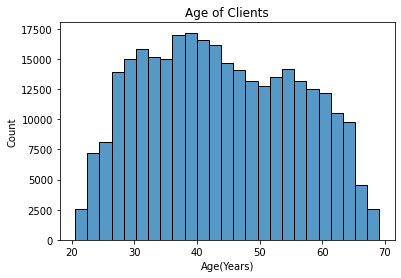

In [30]:
# Plot distribution of the age of clients, Lesson, check seaborn documentations for different kinds of plots
sns.histplot(x = data['DAYS_BIRTH']/-365, data = data, bins = 25)
plt.xlabel('Age(Years)')
plt.title('Age of Clients')

Plotting a histogram allows us to see the distribution of the age of the clients. However, by itself we see that the distribution fo age in this case does not tell us much other than that there are no outliers in the age of clients.

Text(0.5, 0, 'Age(Years)')

Text(0.5, 1.0, 'Distribution of Ages')

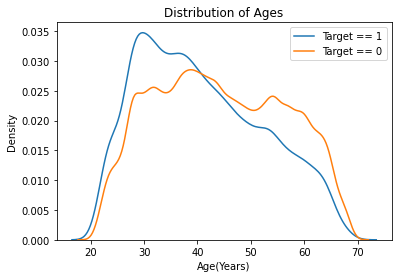

In [31]:
sns.kdeplot(x = data[data['TARGET']==1]['DAYS_BIRTH']/-365, data = data, label = 'Target == 1')
sns.kdeplot(x = data[data['TARGET']==0]['DAYS_BIRTH']/-365, data = data, label = 'Target == 0')
plt.legend()
plt.xlabel('Age(Years)')
plt.title('Distribution of Ages')

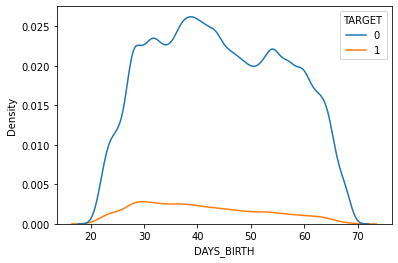

In [32]:
sns.kdeplot(x = data['DAYS_BIRTH']/-365, data = data, hue = 'TARGET')

Alternatively we can separate the data by their values in the "TARGET" columns to show the distribution of client ages for clients who have no problem repaying loans vs clients who have problems repaying loans. A KDE plot can be thought of as a smoothed histogram, the main difference being the y-axis which shows the density in kdeplot vs the absolute number in the histogram.

In the above plot we see that the distribution of client ages when "TARGET" is 0 looks very similar to the distribution seen from the histogram. However when we look at the distribution when "TARGET" is 1 the plot is skewed towards the younger clients. Since "TARGET" == 1 refers to clients who have trouble repaying their loans the plot shows that maybe younger clients will be more likely to not repay their loan.

This suggests that the 'DAYS_BIRTH' variable may be a predictor that we should include when modelling.

***

Using the above as reference, explore a few other variables and try to include some reasonings and any insights that you think you have gathered from your explorations in your notebook, **Lesson 4** shows some commonly used visualisations.

##  <span style='color:blue '> Requirements 3: Data cleaning  </span>
### <u> 3.1 Missing Values </u>
To keep things simple I suggest dropping any columns with more than 30% of its data missing, and imputing the rest with the median of the column if column contains numeric data. If column contains categorical data you can add a new category to mark the data as missing. (e.g. If a client's Gender data is missing you can replace the data point with 'U' to mark the gender as unknown) (**Lesson 4** using fillna)<br><br> To select columns that has less than 30% of its data missing the following code can serve as reference. 

In [33]:
#check(sum up) the number of missing values in each column
print("number of missing values:")
data.isnull().sum()

# divide by number of rows to get % of missing values in each column
missing_data = data.isnull().sum()/len(data)
print("missing data:")
missing_data

# get the columns with less than 30% of its data missing
columns_to_keep = missing_data[missing_data <= 0.3]
print("columns to keep:")
columns_to_keep

# select data from the selected columns
data = data[columns_to_keep.index]
print("remaining data: ")
data

number of missing values:


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

missing data:


SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

columns to keep:


SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 72, dtype: float64

remaining data: 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### <u> 3.2 Handling Outliers </u>
Explore variables with outliers
#### *Example: DAYS_EMPLOYED*

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


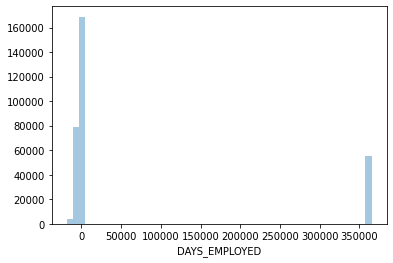

Interpretation:
The non-anomalies default on 8.66% of loans.
The anomalies default on 5.40% of loans.
There are 55374 anomalous days of employment.


In [34]:
# Handle Outliers
data['DAYS_EMPLOYED'].describe() #note that the max is 365243 (anomaly)
sns.distplot(data['DAYS_EMPLOYED'], kde=False); ##we plot this to show the distribution
plt.show()
print('Interpretation:')
print('The non-anomalies default on %0.2f%% of loans.' % (100 * data[data['DAYS_EMPLOYED'] != 365243]['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans.' % (100 * data[data['DAYS_EMPLOYED'] == 365243]['TARGET'].mean()))
print('There are %d anomalous days of employment.' % len(data[data['DAYS_EMPLOYED'] == 365243]))


### <u> 3.3 Feature Encoding </u>
Categorical data has to be encoded before model training because machine learning models deal with numbers only.<br>
Use either ordinal encoding or OneHotEncoding
(**Lesson 5**)

In [35]:
# separate your categorical and numerical column
cat_cols = [] #create empty list of categorical columns
num_cols= [] #create empty list of numerical columns
for col in data.columns:
    if data[col].map(type).eq(str).any(): #check if there are any strings in column
        cat_cols.append(col)
    else:
        num_cols.append(col) #if no strings in the column, then column is numerical, add it to list num_cols
        
print("Categorical columns are:")
print(cat_cols)
print("Numerical columns are:")
print(num_cols)

Categorical columns are:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
Numerical columns are:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',

In [36]:
#peek at what kind of values there are in the categorical columns

for col in cat_cols: #for each column in list of categorical columns
    print(col,data[col].unique()) #print out all the unique(distinct) values in that column

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
WEEKDAY_APPR_PROCESS_START ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
ORGANIZATION_TYPE ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employ

In [37]:
#since we have the column names separated, we can subset the entire data into data_cat and data_num
data_cat= data[cat_cols] #extract data with categorical columns
data_num= data[num_cols] #extract data with numerical columns

In [38]:
# now we need to encode only the categorical columns
encat = pd.get_dummies(data_cat, data_cat.columns)
encat #we can now see that the string values are converted to numbers

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
307508,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### <u> 3.4  Feature Scaling </u>
In certain cases scaling the data may be desirable, for this project we can try to use StandardScaler() (**Lesson 5**)

*Example:*

In [39]:
data_num


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# we want to ONLY scale the numerical columns (not categorical)
scaler = StandardScaler() #initialise the Scaler
scaler.fit(data_num)
data_num_scaled = data_num.copy() #make a copy
data_num_scaled[num_cols] = scaler.transform(data_num[num_cols]) # assign back to update
data_num_scaled #we can see that the values are in the same range

StandardScaler()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,1.506880,-0.456215,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-0.481452
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,-0.166821,-0.460115,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,-0.689509,-0.453299,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,-0.680114,-0.473217,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892535,-0.473210,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.577538,-0.047646,-0.855489,0.031008,-0.848287,0.845396,1.537586,-0.453377,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307507,1.732381,-0.296342,-0.577538,-0.408219,-0.818594,-1.042319,-0.848287,0.310593,-1.085707,2.133617,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.732391,-0.296342,-0.577538,-0.066623,0.195379,0.198046,0.126145,-1.147120,0.245417,-0.507774,...,-0.090534,-0.024402,-0.022529,-0.018305,11.849848,-0.063203,-0.167878,0.799786,-0.334328,-0.481452
307509,1.732401,3.374485,-0.577538,0.009287,-0.568757,-0.476315,-0.592499,-1.124635,0.934008,-0.485583,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.076357,-0.063203,-0.167878,-0.291916,-0.334328,-1.016414


In [41]:
#concat(combine) scaled numerical (step 3.5) and encoded categorical (step 3.4) columns back together
data_ready= pd.concat([data_num_scaled, encat], axis = 1)
data_ready.head(10) #peek at data, check if there are any strings remaining

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,-0.166146,-0.507236,-0.149452,1.506880,-0.456215,...,0,0,0,0,0,0,0,0,0,0
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,0.592666,1.599974,-1.252750,-0.166821,-0.460115,...,0,0,0,0,0,0,0,0,0,0
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,-1.404649,-1.091895,-0.783451,-0.689509,-0.453299,...,0,0,0,0,0,0,0,0,0,0
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,0.177865,-0.653401,-0.928991,-0.680114,-0.473217,...,0,0,0,0,0,0,0,0,0,0
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,-0.361748,-0.068741,0.563570,-0.892535,-0.473210,...,0,0,0,0,0,0,0,0,0,0
5,-1.733364,-0.296342,-0.577538,-0.294354,-0.269648,0.028214,-0.227087,1.078997,-0.207151,-0.462947,...,0,0,0,0,0,0,0,0,0,0
6,-1.733354,-0.296342,0.807273,0.009287,2.389375,0.979213,2.318618,1.078997,0.517645,-0.473862,...,0,0,0,0,0,0,0,0,0,0
7,-1.733345,-0.296342,-0.577538,0.806342,2.313036,1.032615,2.684030,-1.283044,-0.644596,-0.454884,...,0,0,0,0,0,0,0,0,0,0
8,-1.733335,-0.296342,-0.577538,-0.237421,1.044955,0.463506,1.015315,-0.161526,-0.930803,2.133617,...,0,0,0,0,0,0,0,0,0,1
9,-1.733325,-0.296342,-0.577538,-0.142533,-0.482064,-0.473210,-0.361071,-0.085250,0.359304,-0.465997,...,0,0,0,0,0,0,0,0,0,0


### <u> 3.5 Train Test Split </u>
Before proceeding to the next step you will have to split the dataset into a training set and a test set (**Lesson 6**)<br>
Below is code for reference on how to use train_test_split on your data that has been cleaned and their categorical variables encoded

In [49]:
# X are the independent variables (features) of your data
X = data_ready.drop("TARGET", axis = 1)
# y is the target variable (label) you want your model to predict
# y = data_ready["TARGET"]

y = data_num['TARGET']
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y = y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  <span style='color:blue '> Requirements 4: Built a Baseline model </span>

### Baseline model
For the baseline model we can simply create a LogisticRegression model (**Lesson 6**)

In [45]:
# # np.all(np.isfinite(X_train))
# X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# X_test = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# np.all(np.isfinite(X_train))

True

In [ ]:
X_train

In [51]:
#initialize logistic regression model
logisticRegr = LogisticRegression()

#fit X_train and y_train
logisticRegr.fit(X_train, y_train)

#use model to predict X_test
predictions = logisticRegr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##  <span style='color:blue '> Requirement 5: Visualize & analyze results </span>

### Evaluate the baseline model
Create the confusion matrix and plot an ROC curve to show the performance of the baseline model (**Lesson 7**)
Take some time to think about what the results says about the model's performance and include your thoughts in your notebook.

[[56488    66]
 [ 4889    60]]


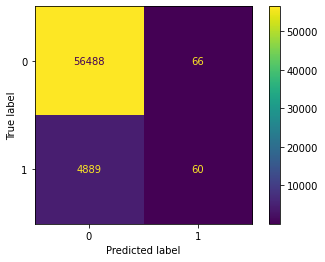

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

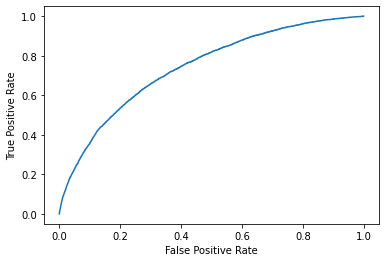

In [52]:
# compare predictions to y_test using confusion matrix
cm =confusion_matrix(y_test, predictions)
print(cm)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegr.classes_)
disp.plot()
plt.show()
# plot and display ROC Curve
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


##  <span style='color:blue '> Requirement 6: Improving the previous model </span>
Using GridSearchCV, tune the parameters of the baseline model (**Lesson 7**)
For LogisticRegression() the tunable parameters are different from the DecisionTreeClassifier() used in the Lesson 7 example, for simplicity just use the parameters below.

In [57]:
logisticRegr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [59]:

# Create the parameters list we wish to tune.
paramters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'C' : [100, 10, 1.0, 0.1, 0.01]}

# conduct gridsearch
clf = GridSearchCV(logisticRegr, param_grid = paramters, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Once GridSearchCV has found the best set of parameters to use, train another LogisticRegression model using the new parameters and evaluate the new model. Comparing the performance metrics between the baseline model and the updated model will show if either model is better performer.

##  <span style='color:blue '> Requirement 7: Identify limitations of dataset and results </span> 
Think about what was missing, unknown, or what you wish you had but was unavailable etc

At each step in your notebook take some time to think about the points mentioned in these requirements.
For example, from the **Section 2.2  Example** in this notebook we realised younger clients were more likely to default on their loan repayment. Does this mean banks should stop serving younger clients? Is there anything banks can do to help?<br><br>

Base on our findings regardig younger clients and thier impact on loan repayment, bank should give loans to other clients instead of younger clients.

##  <span style='color:blue '> Requirement 8: Explain the results </span> 
Within the section of your notebook where you're evaluating the predictive models try to include an explanation of what the metrics are telling us about the model in a way that the laymen can understand. (**Lesson 6**)

Confusion matrix is telling us the model perfromance on test data. Diagnol values shows the true positive values which means all those value which are aligned with the actual values. Apart from that, it tells us false positive, false negative and true negative values from the predicted values.

##  <span style='color:blue '> Requirement 9: Make suggestions based on your findings. </span> 

###Suggestions
Banks should prefer older clients for loan. 

*   Banks should prefer older clients for loan.
*   People with target 1 and 0 have same agr distribution


